In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/loan_application_status.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
ds=data.drop('Loan_ID',axis=1).copy()   # we dont need ID for status prediction, thats why we drop it here.

## EDA

In [4]:
ds.shape

(614, 12)

dataset has 614 columns and 13 rows.

In [5]:
ds.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
ds.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see that many columns have null values. we try to resolve it later.

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


There are 7 columns are object type, 4 columns are float type and 1 is int type

In [8]:
ds.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
ds.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
ds.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
ds.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
ds.loc[ds['Dependents']=='3+'].shape

(51, 12)

51 columns have value like 3+, we can change them into 3 only.

In [13]:
ds['Dependents']=ds['Dependents'].replace('3+','3').astype(float)

In [14]:
ds.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

In [15]:
ds.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
ds.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
ds.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
ds.Credit_History.unique()

array([ 1.,  0., nan])

In [19]:
ds.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

### Filling the missing values.

In [20]:
ds.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
ds['Gender']=ds['Gender'].fillna(ds['Gender'].mode()[0])
ds['Married']=ds['Married'].fillna(ds['Married'].mode()[0])
ds['Self_Employed']=ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0])
ds['Dependents']=ds['Dependents'].fillna(ds['Dependents'].mode()[0])
ds['Credit_History']=ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])
ds['LoanAmount']=ds['LoanAmount'].fillna(ds['LoanAmount'].median())
ds['Loan_Amount_Term']=ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].median())

In [22]:
ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### separating categorical and numerical columns

In [23]:
ds_cat=ds.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
ds_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,1.0,Urban,Y


In [24]:
ds_num=ds[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].copy()
ds_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [25]:
ds_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


Loan amount and Loan_Amount_Term has null values.
In these columns mean and std have very large difference, means they are very skewed data.
Here 75% and max have large difference, that means outliers are present.
We handle all the flaws later.

### Univariate Analysis

In [26]:
ds_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

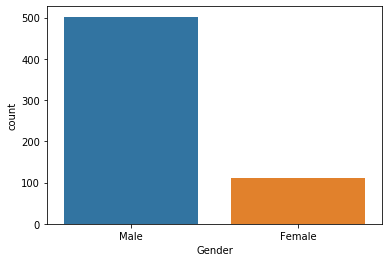

In [27]:
sns.countplot(ds_cat['Gender'])

Maximum males are applied for loan than female.

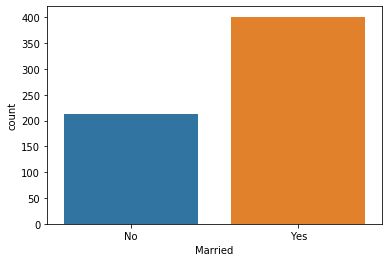

In [28]:
sns.countplot(ds_cat['Married'])

Maximum loan is applied by married people.

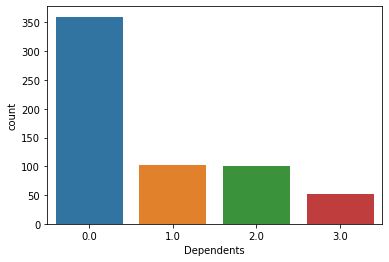

In [29]:
sns.countplot(ds['Dependents'])

Maximun loan applied by them who are not dependent on anyone.
Very less loan applied by them who are dependent on more than 3 people.

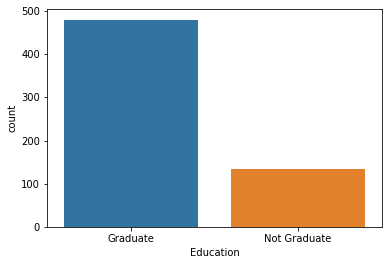

In [30]:
sns.countplot(ds_cat['Education'])

Maximum number of loan is applied by who already graduate and very less by non-graduate.

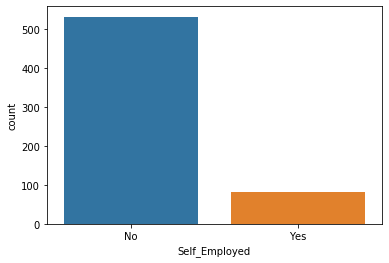

In [31]:
sns.countplot(ds_cat['Self_Employed'])

Maximum loan applied by who are not self employed.

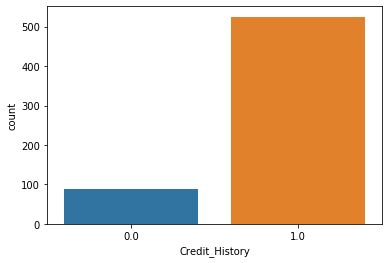

In [32]:
sns.countplot(ds_cat['Credit_History'])

Maximum loan applier has payed their loan on time as their credit is 1.

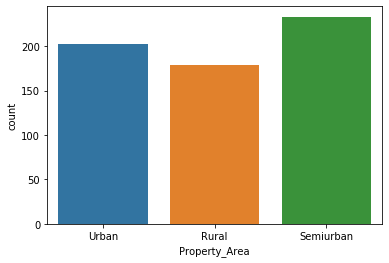

In [33]:
sns.countplot(ds_cat['Property_Area'])

Maximum no of loan applied by the who are from semiurban area and after that urban area and then rural area.

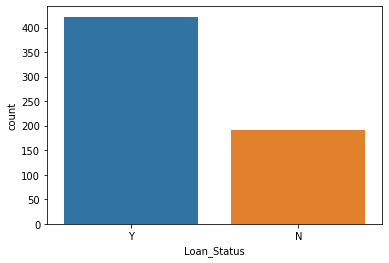

In [34]:
sns.countplot(ds_cat['Loan_Status'])

Maximum loan status is given yes.

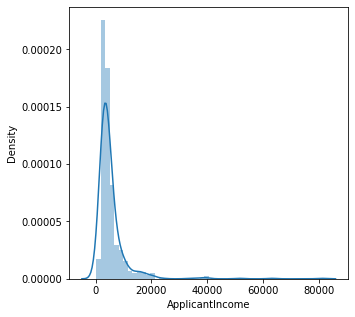

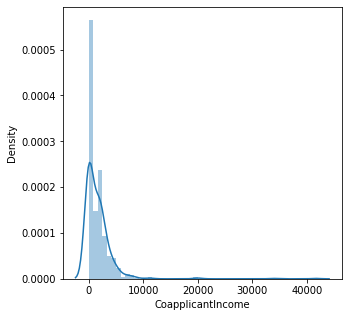

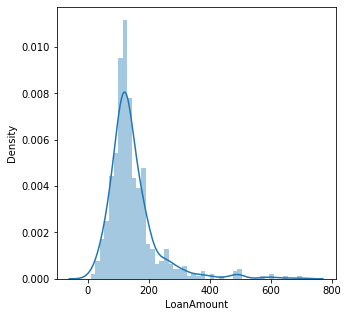

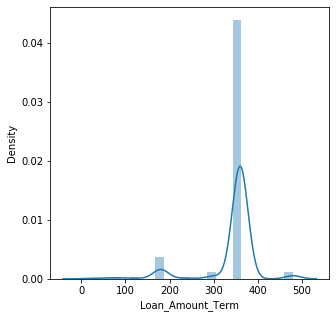

In [35]:
for i in ds_num.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(ds_num[i])
    plt.show()

No numerical column is normally distributed, they are right skewed.

### Bivariate Analysis

In [36]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Education']).T

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


Maximum loan is clear who are graduate.

In [37]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Gender']).T

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


Maximum loan is clear who are male.

In [38]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Married']).T

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


Maximun yes for married person.

In [39]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Dependents']).T

Loan_Status,N,Y
Dependents,,
0.0,113,247
1.0,36,66
2.0,25,76
3.0,18,33


Most of people get loan who are Independent.

In [40]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Self_Employed']).T

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


Maximum people got loan who are not self employed.

In [41]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Credit_History']).T

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


very veryy less number of people got loan who have credit history as 0.0.
better the credit_history higher the chance of getting loan.

In [42]:
pd.crosstab(ds_cat['Loan_Status'],ds_cat['Property_Area']).T

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


Maximum no. of people from semiurban get the loan as compare to urban and rural.

Here we can conclude that, a male person from semiurban area who is graduate,not self employed even married, Independent and credit history as 1.0 got loan clearance for sure.

### Multivariate Analysis

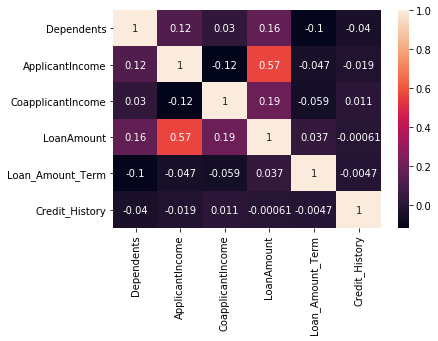

In [43]:
sns.heatmap(ds.corr(),annot=True)

LoanAmount and ApplicationIncome are quite correlated to each other.

### Encoding

In [44]:
from sklearn.preprocessing import OrdinalEncoder
oen=OrdinalEncoder()

In [45]:
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
ds['Gender']=oen.fit_transform(ds['Gender'].values.reshape(-1,1))
ds['Married']=oen.fit_transform(ds['Married'].values.reshape(-1,1))
ds['Education']=oen.fit_transform(ds['Education'].values.reshape(-1,1))
ds['Self_Employed']=oen.fit_transform(ds['Self_Employed'].values.reshape(-1,1))
ds['Property_Area']=oen.fit_transform(ds['Property_Area'].values.reshape(-1,1))
ds['Loan_Status']=oen.fit_transform(ds['Loan_Status'].values.reshape(-1,1))

In [47]:
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


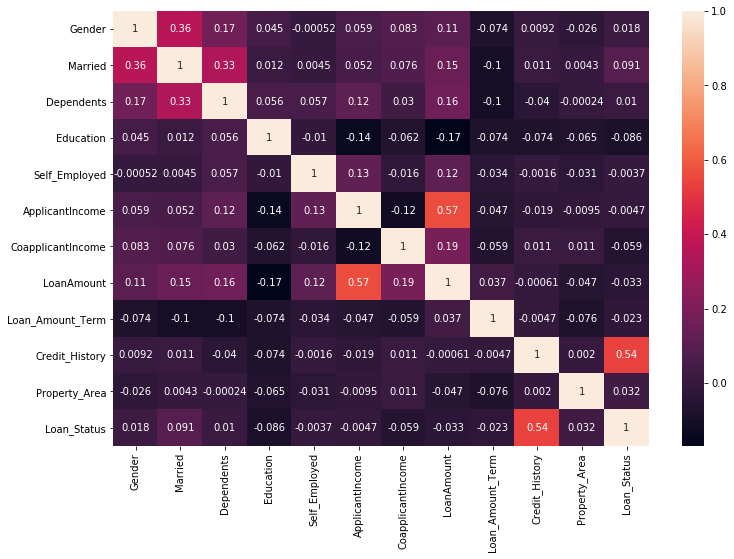

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True)

Loan status is quite correlated to credit history. Education is quite less correlated to target variable.

### Checking for Outliers

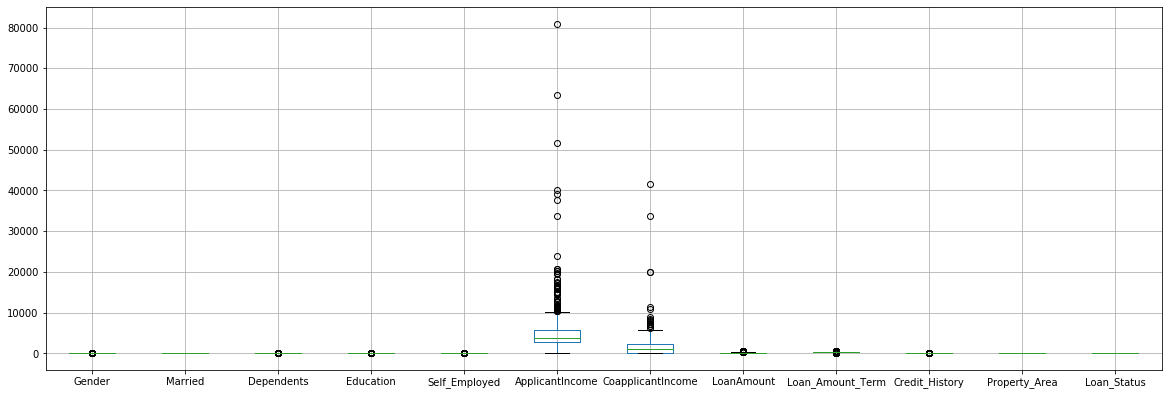

In [49]:
ds.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

ApplicationIncome and CoapplicationIncome have maximum outliers rest of them quite ok.

In [50]:
# Removing the outliers

from scipy.stats import zscore

In [51]:
z=np.abs(zscore(ds))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [52]:
threshold=3
ds_new=ds[(z<3).all(axis=1)]
ds_new.shape

(577, 12)

In [53]:
ds.shape

(614, 12)

In [54]:
((614-577)/614)*100

6.026058631921824

Almost 6% of data we have to lost after removing the outliers. We can go ahead with this.

In [55]:
ds_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


### Checking for skewness

In [56]:
ds_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Here we can see that every columns  are skewed except Property area. So we are going to remove skewness from numerical columns only.

In [57]:
# Removing of skewness....

from sklearn.preprocessing import PowerTransformer

In [58]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)
ds_new['ApplicantIncome']=pt.fit_transform(ds_new['ApplicantIncome'].values.reshape(-1,1))
ds_new['CoapplicantIncome']=pt.fit_transform(ds_new['CoapplicantIncome'].values.reshape(-1,1))
ds_new['LoanAmount']=pt.fit_transform(ds_new['LoanAmount'].values.reshape(-1,1))
ds_new['Loan_Amount_Term']=pt.fit_transform(ds_new['Loan_Amount_Term'].values.reshape(-1,1))

In [59]:
ds_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### Spliting the data into train and test

In [60]:
x=ds_new.drop('Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,0.681780,-1.122446,0.000771,0.130788,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,0.234783,0.744117,0.000771,0.130788,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,-0.527201,-1.122446,-1.437336,0.130788,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,-0.791972,0.895786,-0.153545,0.130788,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.728848,-1.122446,0.238260,0.130788,1.0,2.0


In [61]:
y=ds_new['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [63]:
x_sc=mms.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)
x_sc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.716341,0.000000,0.573236,0.389073,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.663827,0.745276,0.573236,0.389073,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.574307,0.000000,0.378830,0.389073,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.543202,0.805834,0.552375,0.389073,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.721871,0.000000,0.605340,0.389073,1.0,1.0


In [64]:
x=x_sc.copy()

### Finding the best Random State

In [65]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.7874015748031497  at random state 119


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=126)

In [67]:
x_train.shape

(450, 11)

In [68]:
x_test.shape

(127, 11)

In [69]:
y_train.shape

(450,)

In [70]:
y_test.shape

(127,)

### Model Training

In [71]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()

In [72]:
model=(lg,dtc,svc,gnb,knn,rfc,ada)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())
    print('\n')

Model LogisticRegression()
accuracy_score 0.8110236220472441
confusion_matrix [[18 22]
 [ 2 85]]
clasification_report               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        40
         1.0       0.79      0.98      0.88        87

    accuracy                           0.81       127
   macro avg       0.85      0.71      0.74       127
weighted avg       0.83      0.81      0.79       127

F1 score 0.8762886597938144
0.8180809595202397


Model DecisionTreeClassifier()
accuracy_score 0.7795275590551181
confusion_matrix [[23 17]
 [11 76]]
clasification_report               precision    recall  f1-score   support

         0.0       0.68      0.57      0.62        40
         1.0       0.82      0.87      0.84        87

    accuracy                           0.78       127
   macro avg       0.75      0.72      0.73       127
weighted avg       0.77      0.78      0.77       127

F1 score 0.8444444444444446
0.7331334332833583


Model SV

### Hyperparameter Tuning using GridSearchCV

In [73]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,10),'penalty':['l1','l2','elasticnet'],'max_iter':[100,150,200,150],'n_jobs':[-1]}
gs=GridSearchCV(lg,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 150, 200, 150], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [74]:
gs.best_params_

{'C': 1, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2'}

In [75]:
lgit=LogisticRegression(C=1,penalty='l2',max_iter=100,n_jobs=-1)
lgit.fit(x_train,y_train)
predlgt=lgit.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlgt))
print('confusion_matrix',confusion_matrix(y_test,predlgt))
print('clasification_report',classification_report(y_test,predlgt))

accuracy_score 0.8110236220472441
confusion_matrix [[18 22]
 [ 2 85]]
clasification_report               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        40
         1.0       0.79      0.98      0.88        87

    accuracy                           0.81       127
   macro avg       0.85      0.71      0.74       127
weighted avg       0.83      0.81      0.79       127



In [76]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1.0,10.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [77]:
gs.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}

In [78]:
sv=SVC(kernel='linear',probability=True,C=1.0,gamma='scale')
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsv))
print('confusion_matrix',confusion_matrix(y_test,predsv))
print('clasification_report',classification_report(y_test,predsv))

accuracy_score 0.8110236220472441
confusion_matrix [[18 22]
 [ 2 85]]
clasification_report               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        40
         1.0       0.79      0.98      0.88        87

    accuracy                           0.81       127
   macro avg       0.85      0.71      0.74       127
weighted avg       0.83      0.81      0.79       127



In [79]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knn,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [80]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'}

In [81]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=9,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.8110236220472441
confusion_matrix [[19 21]
 [ 3 84]]
clasification_report               precision    recall  f1-score   support

         0.0       0.86      0.47      0.61        40
         1.0       0.80      0.97      0.88        87

    accuracy                           0.81       127
   macro avg       0.83      0.72      0.74       127
weighted avg       0.82      0.81      0.79       127



In [82]:
# FOR RANDOM FOREST CLASSIFIER

parameterS={'n_estimators':(100,150,200,250),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameterS,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 250)})

In [83]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}

In [86]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=150)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.7716535433070866
confusion_matrix [[19 21]
 [ 8 79]]
clasification_report               precision    recall  f1-score   support

         0.0       0.70      0.47      0.57        40
         1.0       0.79      0.91      0.84        87

    accuracy                           0.77       127
   macro avg       0.75      0.69      0.71       127
weighted avg       0.76      0.77      0.76       127



In [87]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[50,100,150,200],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(ada,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [88]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 50}

In [89]:
ad=AdaBoostClassifier(algorithm='SAMME',learning_rate= 0.0001,n_estimators=50)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.8110236220472441
confusion_matrix [[18 22]
 [ 2 85]]
clasification_report               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        40
         1.0       0.79      0.98      0.88        87

    accuracy                           0.81       127
   macro avg       0.85      0.71      0.74       127
weighted avg       0.83      0.81      0.79       127



All the model given the almost same accuracy, except random forest so we drop it here and for rest of them we are going to check AUC ROC SCORE.

## AUC ROC CURVE AND SCORE

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve

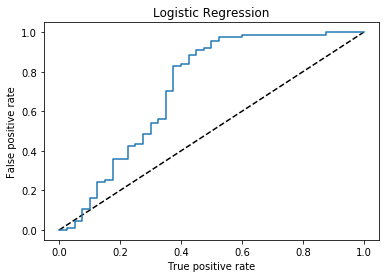

In [91]:
# FOR LOGISTIC REGRESSION

pred_prob=lgit.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Logistic Regression')
plt.show()

In [92]:
auc_score=roc_auc_score(y_test,predlgt)
auc_score

0.7135057471264368

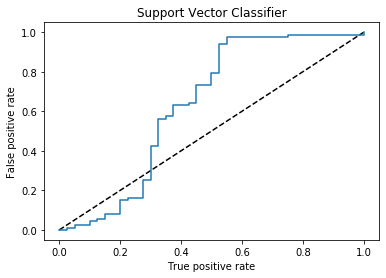

In [93]:
# FOR SVC

pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [94]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

0.7135057471264368

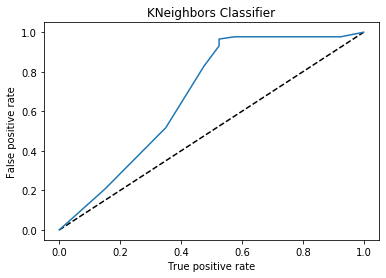

In [95]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [96]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.7202586206896552

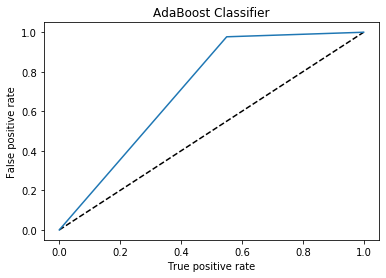

In [97]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [98]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.7135057471264368

On the basis of roc_auc_score, we can clearly see that KNeighbors works best among all. So our final is KNeighbors Classifier.

### Saving our Final Model

In [99]:
import joblib

In [100]:
joblib.dump(kn,'loan_app_sts_knn.obj')

['loan_app_sts_knn.obj']